CIFAR10 models adopted from https://github.com/huyvnphan/PyTorch_CIFAR10

In [1]:
#  Colab only
from google.colab import drive
%matplotlib inline


drive.mount("/content/drive")

Mounted at /content/drive


# Base Imports

In [2]:
import sys
import torch
from torchvision.datasets import CIFAR10, MNIST


PATH = "/content/drive/My Drive/Colab Notebooks/EECS553ML_reproduce/"
#PATH = "/content/drive/My Drive/EECS553ML_reproduce/"
sys.path.append(PATH)

In [3]:
from resnet18 import ResNet152
import dataset


dataset.MODEL = "ResNet-152"
DATA = MNIST
#DATA = CIFAR10

# Model

In [4]:
if DATA is CIFAR10:
    model = ResNet152()
    model.load_state_dict(
        torch.load(PATH + "cifar10_resnet152_model.t7", 
                   map_location=torch.device('cpu'))
    )
else:
    model = ResNet152(size_for_cifar=False)
    model.load_state_dict(
        torch.load(PATH + "mnist_resnet152_model.t7", 
                   map_location=torch.device('cpu'))
    )
model.eval()

ResNet152(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, t

## Model Accuracy

In [5]:
from dataset import Dataset


ds = Dataset(model, DATA)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
print("Accuracy of the network on test images:", 
      ds.accuracy_pytorch())

Accuracy of the network on test images: 0.0974


In [ ]:
print(f"Model accuracy:", ds.accuracy())

Model accuracy: 0.9879


K = 8
Prediction time for batch size 8: 2.495270 seconds
100% completed
Time: 753.155147 seconds
K = 12
Prediction time for batch size 12: 3.663209 seconds
100% completed
Time: 1112.415102 seconds


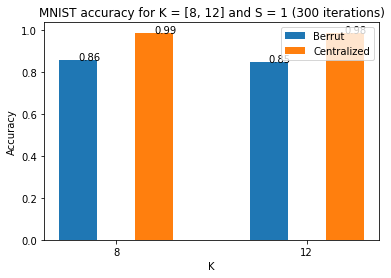

In [ ]:
ds.plot_K(S=1, K_list=[8, 12])

K = 8
Prediction time for batch size 8: 2.663647 seconds
100% completed
Time: 801.934962 seconds


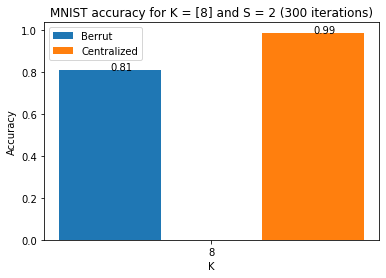

In [ ]:
ds.plot_K(S=2)

K = 8
Prediction time for batch size 8: 2.839649 seconds
100% completed
Time: 843.942202 seconds


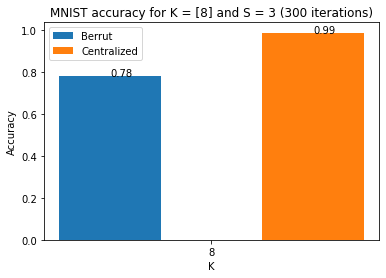

In [ ]:
ds.plot_K(S=3)